#### ANEXO A

# Conjuntos de Entrenamiento y Validación

#### Elaborado por: Ricardo Niño de Rivera Barrón

#### Ingeniería Biónica

#### Trabajo Terminal II

En esta libreta interactiva en python 3.6 describimos el proceso mediante el cual se realizó la construcción de los conjuntos de ENTRENAMIENTO Y VALIDACIÓN para el TRABAJO TERMINAL II.

Este Script fue implemntado de forma local en un sistema operativo Windows 7.

Importando liberías necesarias

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
#Leyendo archivo csv
df=pd.read_csv('PACIENTES.csv',  encoding = "ISO-8859-1")

In [3]:
df.head()

,ID,Records,Name,Age,Exams,Diagnosis,Side,Complaints,Mammography,Radiotherapy,...,Use of hormone replacement,Is there signal of wart on breast?,Wart,Body temperature,Race,Smoked,Drank coffe,Comsumed alcohol,Physical exercise,"Put some pomade, deodorant or products at breasts or armpits region?"
0,1,Voluntária,PRIVATE,72,Thermography,Healthy,NaN,NaN,1,0.0,...,0.0,1.0,both,34.9,Pardo,NaN,NaN,NaN,NaN,NaN
1,2,77020,PRIVATE,65,Thermography,Healthy,NaN,1.0,1,0.0,...,1.0,0.0,0,36.5,Pardo,0.0,0.0,0.0,0.0,0.0
2,4,Voluntária,PRIVATE,66,Thermography,Healthy,NaN,1.0,1,0.0,...,0.0,0.0,0,35.7,Black,NaN,NaN,NaN,NaN,NaN
3,5,Voluntária,PRIVATE,65,Thermography,Healthy,NaN,0.0,1,0.0,...,0.0,0.0,0,35.9,White,NaN,NaN,NaN,NaN,NaN
4,6,Voluntária,PRIVATE,53,Thermography,Healthy,NaN,0.0,0,0.0,...,0.0,0.0,0,35.4,Pardo,NaN,NaN,NaN,NaN,NaN


Leyendo las imágenes de la base de datos con imágenes frontales

In [4]:
files = os.listdir('C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDatosTT2_Parte2_FRONTALES')

In [5]:
len(files)

4211

Explorando el conjunto de pacientes total con respecto al diagnóstico final.
Recordemos que el disganóstico se realizó con respcto a lo señalado en la Norma Mexicana para la detección y tratamiento de cáncer de mama NOM... Los falso negativos se controlaron con un seguimiento de para descartar desarrollo de carcinoma maligno.

In [6]:
#Pacientes totales
df.Diagnosis.count()

212

In [7]:
#Pacientes por clase de salida (Sana, Enferma)
df.Diagnosis.value_counts()

Healthy    172
Sick        40
Name: Diagnosis, dtype: int64

Imprmiendo las pimeras 20 imágenes del conjunto (Recordemos que existen varias imágenes tomadas en diferentes fechas para distintas pacientes con diferentes protocolos de adquisición).

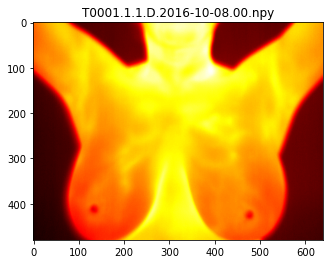

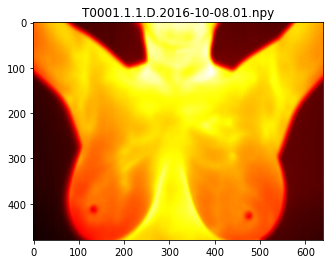

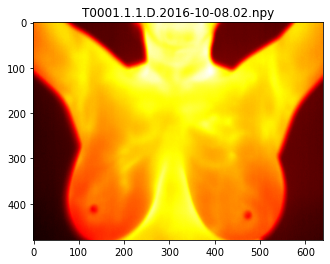

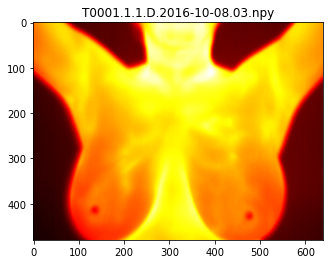

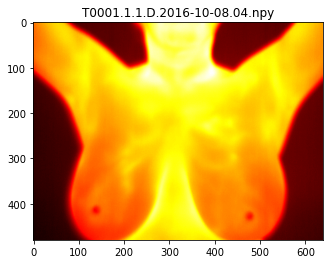

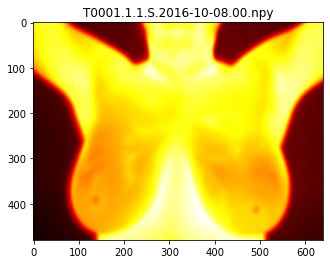

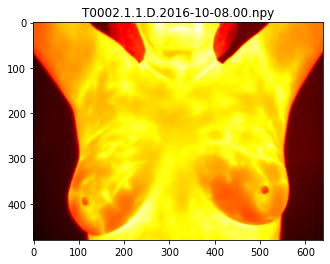

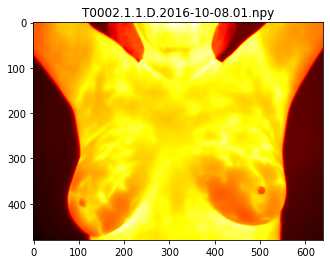

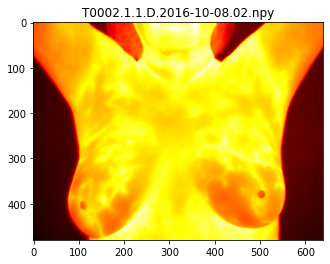

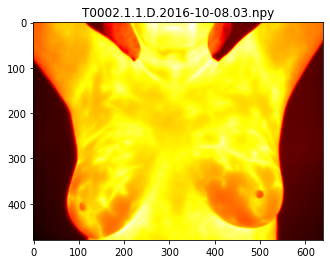

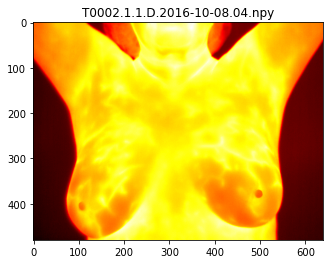

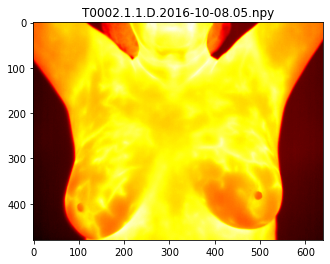

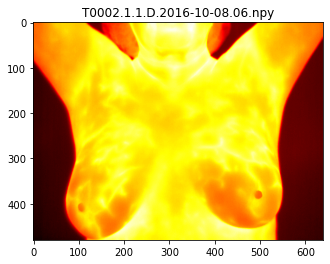

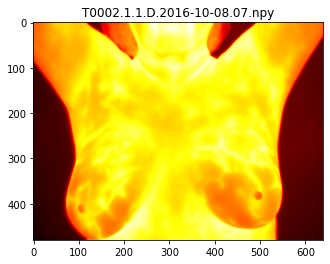

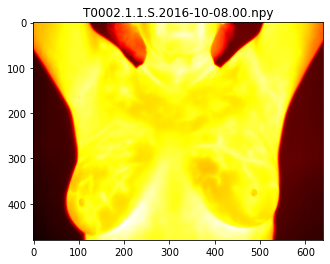

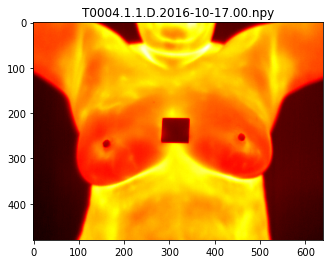

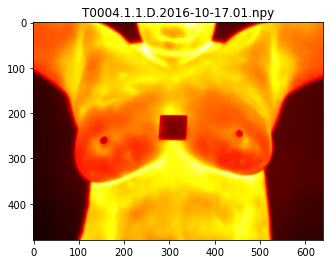

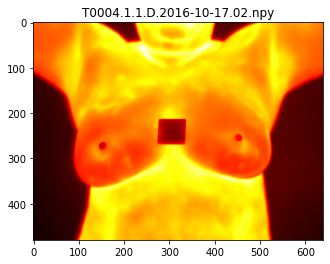

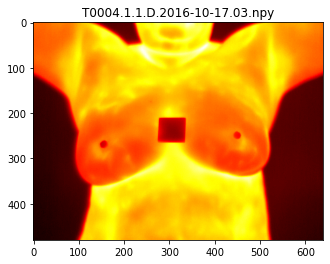

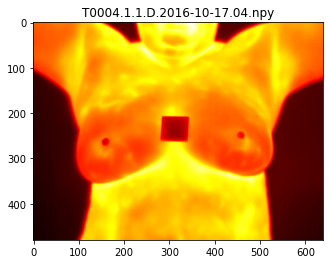

In [8]:
count=0
for i in files:
    
    temp=np.load("BaseDatosTT2_Parte2\\"+i)
    print()
    plt.title(i)
    plt.imshow(temp, cmap='hot')
    plt.show()
    count+=1
    
    if count==20:
        break

# Formando los conjuntos

Para crear estos conjuntos tomaremos en cuenta los ID's únicos y no las imágenes. Esto se realiza con el fin de evitar sobrestimar la eficiencia del sistema, ya que utilizar imágenes de un paciente en el entrenamiento y posteriromente validar con imágenes del mismo conduce a conclusiones sesgadas por el "conocimiento" previo del sistema de las características del paciente.

In [9]:
#Leyendo ID's únicos
IDs=df["ID"].to_numpy()

In [10]:
IDs

array([  1,   2,   4,   5,   6,   7,   8,   9,  10,  12,  13,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  26,  28,  30,  31,  32,
        34,  35,  36,  37,  38,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  52,  55,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  75,  80,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 104, 105, 106, 107, 108, 110, 111, 113, 115, 116, 121,
       125, 126, 127, 129, 130, 131, 132, 135, 136, 137, 138, 141, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173,
       174, 176, 177, 179, 180, 181, 182, 183, 184, 185, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 208, 209, 210, 211, 212, 213, 216, 217, 218, 219, 220, 221,
       222, 224, 225, 226, 233, 234, 235, 236, 237, 238, 239, 24

Ahora creamos los dos conjuntos de validación, establcemos los parametroos random_state=42 para tener valores respoducibles en diferntes ocasiones y shuffle=True para revover los IDs antes de que sean distribuidos en los conjuntos de ENTRENAMIENTO y VALIDACIÓN. El parámetro trian_size=0.8 establece la proporción de elementos en el conjunto de entrenamineto, en este caso 80% de los ID's únicos estarán en el conjunto de ENTRENAMIENTO.

In [11]:
#Creamos los dos cojuntos de valida
train_IDs,test_IDs=train_test_split(IDs, train_size=0.8, random_state=42, shuffle=True)

In [12]:
#Imprimiendo train_IDs
train_IDs

array([171, 148,  90, 108, 132, 138,  47,  31, 245, 161,  37,  23, 246,
       130,  88,  87,   7, 224,  68, 135, 209, 271,  86, 165, 240,  40,
        16,  44,  36,  51, 182, 270, 192,  63, 162, 225,  97,  50, 226,
        99, 169,  34, 189, 151, 177,   4,  98,  58, 172, 153, 121, 110,
       190,  45, 163,  73,  28, 185, 152,  42,  15, 281, 221,   8,  35,
       266, 276, 193,   6,  41, 160, 201, 274, 200, 154,  13,  75, 168,
       202, 235,   1, 261, 212,  91, 217,  85,  55, 184,  49, 166,  30,
       210, 203, 105,  48, 238,  59, 129, 213,  52, 194,   5, 145,  65,
       179, 263, 218, 269,  61, 104,  43,   9, 150, 125, 107, 278, 264,
       116,  10,  17,  71, 243, 176,  21, 219,  93, 255, 180, 236, 267,
        80,  66, 147,  62, 234, 283, 222,  70,  60, 115,  26,  69, 211,
       277, 256, 173,  46, 208, 272,   2,  64, 197, 174, 199, 143, 136,
       159, 113,  95, 164, 287,  24, 257,  92, 146,  18, 126, 239, 141],
      dtype=int64)

In [13]:
train_IDs.shape

(169,)

In [14]:
#Imprimiendo test_IDs
test_IDs

array([ 38, 233, 188,  96,  72, 285,  57, 244,  12, 137, 183, 259, 204,
       106,  19, 273, 220,  22, 286, 111, 100,  67, 196, 282, 198, 191,
        32, 144,  20, 237, 181, 170, 149,  89,  94, 195, 241, 131, 260,
       127, 158, 216, 268], dtype=int64)

In [15]:
test_IDs.shape

(43,)

Explorando los conjuntos de forma más detallada.

¿Cuántos elementos ID's en el entrenamiento son positivos (enfermos)?

In [16]:
df.loc[df["ID"].isin(train_IDs)].ID.count()

169

In [17]:
df.loc[df["ID"].isin(train_IDs)].Diagnosis.value_counts()

Healthy    140
Sick        29
Name: Diagnosis, dtype: int64

¿Cuántos elementos ID's en la validación son positivos (enfermos)?

In [18]:
df.loc[df["ID"].isin(test_IDs)].ID.count()

43

In [19]:
df.loc[df["ID"].isin(test_IDs)].Diagnosis.value_counts()

Healthy    32
Sick       11
Name: Diagnosis, dtype: int64

# Construyendo los directorios train y test

In [20]:
#Creando carpeta BaseDeDatosFrontales_FINAL
os.mkdir('BaseDeDatosFrontales_FINAL')

In [21]:
#Creando subcarpeta train en BaseDeDatosFrontales_FINAL
os.mkdir('BaseDeDatosFrontales_FINAL\\train')

In [22]:
#Creando subcarpeta test en BaseDeDatosFrontales_FINAL
os.mkdir('BaseDeDatosFrontales_FINAL\\test')

Copiamos las imágenes del conjunto de entrenamiento en el directorio train

In [23]:
count=0
for i in files:
    for j in train_IDs:
        if int(i[1:5])==j:
            count+=1
            #print(count)
            temp=np.load("BaseDatosTT2_Parte2_FRONTALES\\"+i)
            np.save('BaseDeDatosFrontales_FINAL\\train\\'+i, temp)
            break


Copiamos las imágenes del conjunto de validación en el directorio test

In [24]:
count=0
for i in files:
    for j in test_IDs:
        if int(i[1:5])==j:
            count+=1
            #print(count)
            temp=np.load("BaseDatosTT2_Parte2_FRONTALES\\"+i)
            np.save('BaseDeDatosFrontales_FINAL\\test\\'+i, temp)
            break

En total tenemos 4169 imágenes, 3337 para entrenamiento y 832 para validación. (42 imágenes no son contabilizadas del directorio original FRONTALES porque previamente fueron eliminadas del archivo csv después de una rigurosa inspección visual lo cual las hizo no patas para su utilización en este trabajo).

# Construyendo arhivos csv train and test

In [26]:
train=df.loc[df["ID"].isin(train_IDs)]

In [27]:
test=df.loc[df["ID"].isin(test_IDs)]

In [28]:
train.to_csv('train.csv', index=False)

In [29]:
test.to_csv('test.csv', index=False)